### 파일명 : 개인성적표저장.ipynb
### 작성일 : 25.04.08
### 작성자 : 오도은

#### 1. 데이터 불러오기 및 처리

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 엑셀 파일 로드
df = pd.read_excel("/content/drive/MyDrive/scores_10.xlsx")
df2 = df.iloc[:13,:] # 필요한 데이터만 가져오기

# 데이터 처리
df2.iloc[7] = df2.iloc[7].apply(lambda x: round(x, 2) if isinstance(x, (int, float)) else x) # 소수점 둘째자리까지만 표시

<ipython-input-2-8476d50b7248>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.iloc[7] = df2.iloc[7].apply(lambda x: round(x, 2) if isinstance(x, (int, float)) else x) # 소수점 둘째자리까지만 표시


#### 2. 한글 폰트 설치 및 처리

In [3]:
# ✅ 한글 폰트 설치
!apt -qq -y install fonts-nanum > /dev/null

In [4]:
!fc-list | grep -i nanum

/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf: NanumSquareRound,나눔스퀘어라운드,NanumSquareRound Bold,나눔스퀘어라운드 Bold:style=Bold,Regular
/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf: NanumGothicCoding,나눔고딕코딩:style=Bold
/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf: NanumSquareRound,나눔스퀘어라운드,NanumSquareRound Regular,나눔스퀘어라운드 Regular:style=Regular
/usr/share/fonts/truetype/nanum/NanumSquareB.ttf: NanumSquare,나눔스퀘어,NanumSquare Bold,나눔스퀘어 Bold:style=Bold
/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf: NanumBarunGothic,나눔바른고딕:style=Regular
/usr/share/fonts/truetype/nanum/NanumGothic.ttf: NanumGothic,나눔고딕:style=Regular
/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf: NanumGothicCoding,나눔고딕코딩:style=Regular
/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf: NanumBarunGothic,나눔바른고딕:style=Bold
/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf: NanumGothic,나눔고딕:style=Bold
/usr/share/fonts/truetype/nanum/NanumSquareR.ttf: NanumSquare,나눔스퀘어:style=Regular
/us

In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 경로 등록
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_bold_path = "/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf"
fm.fontManager.addfont(font_path)
fm.fontManager.addfont(font_bold_path)

# 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

fontprop = fm.FontProperties(fname=font_bold_path)

#### 3. 학생 별 성적표 이미지로 저장
파일명: 학생이름

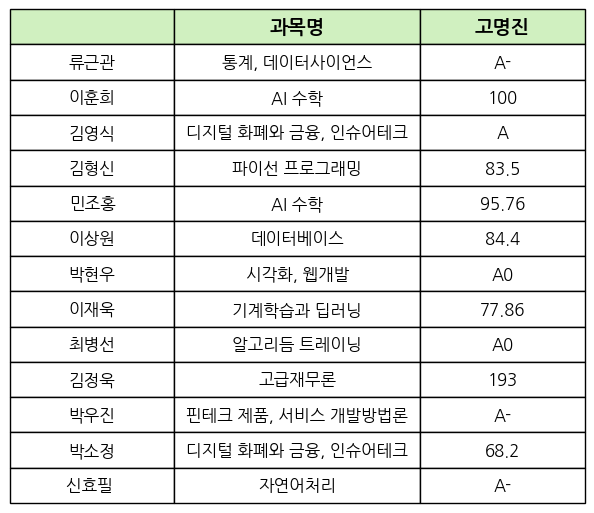

고명진 saved


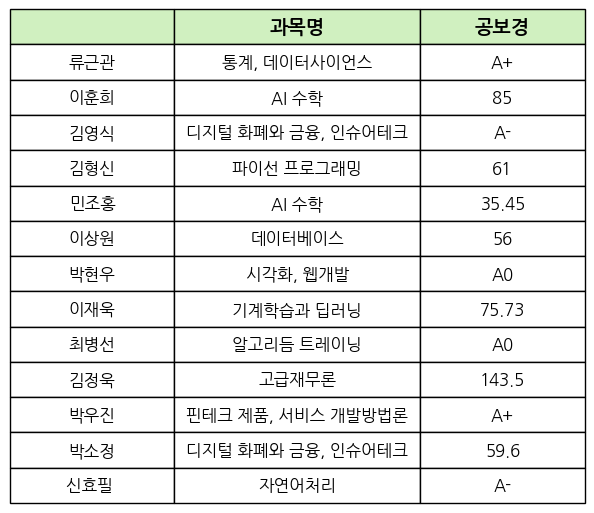

공보경 saved


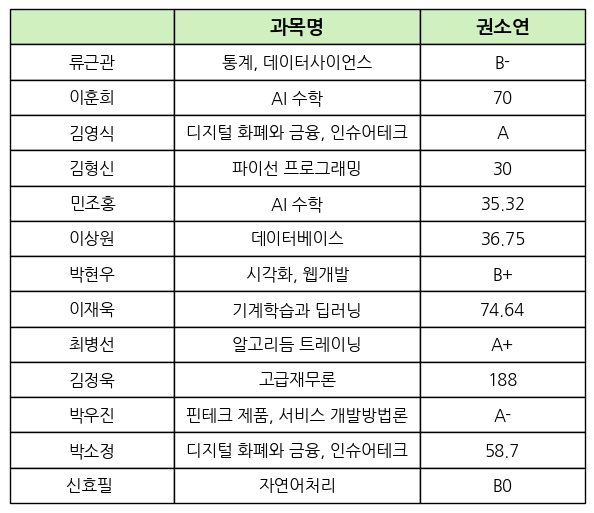

권소연 saved


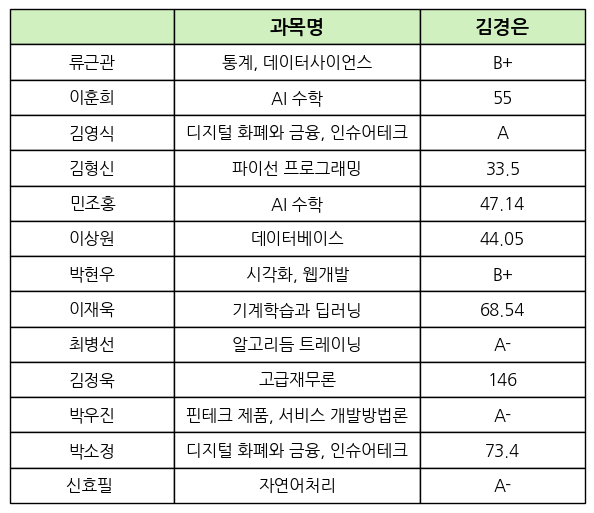

김경은 saved


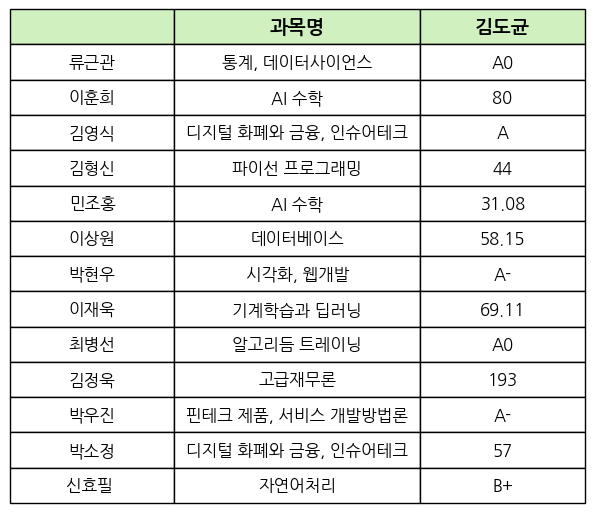

김도균 saved


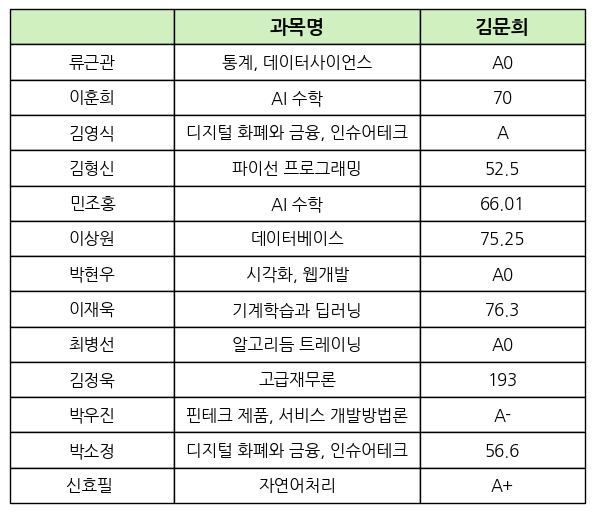

김문희 saved


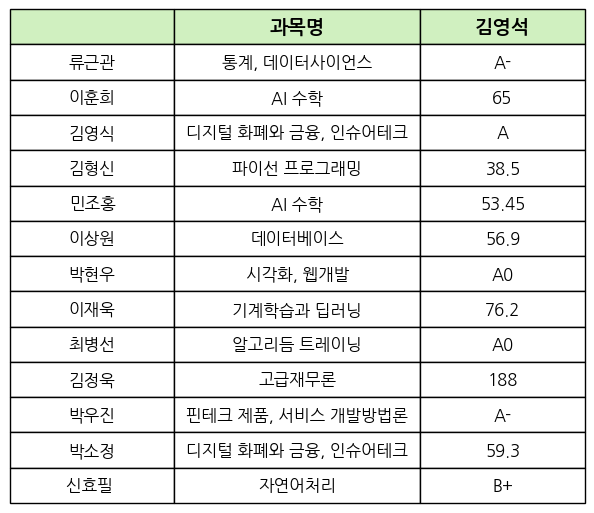

김영석 saved


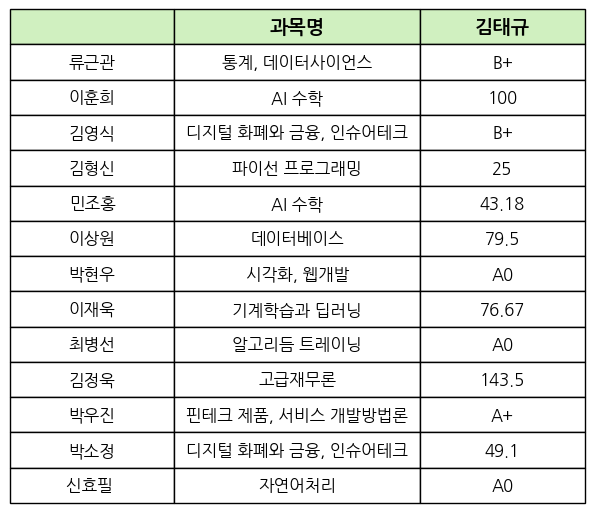

김태규 saved


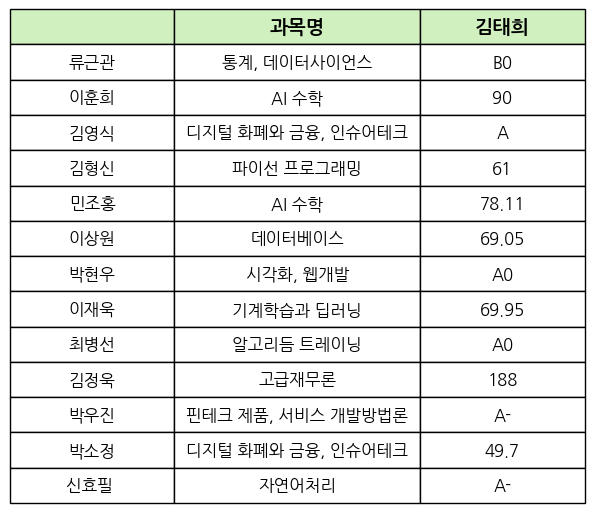

김태희 saved


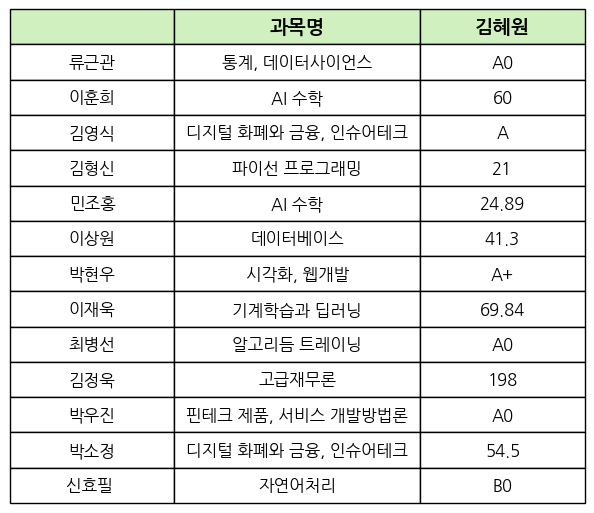

김혜원 saved


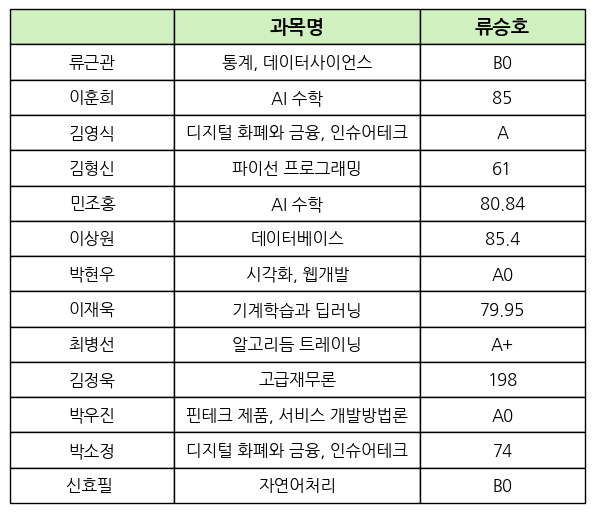

류승호 saved


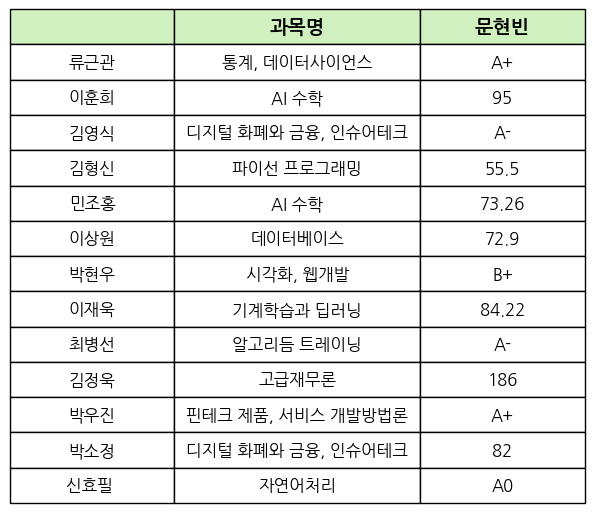

문현빈 saved


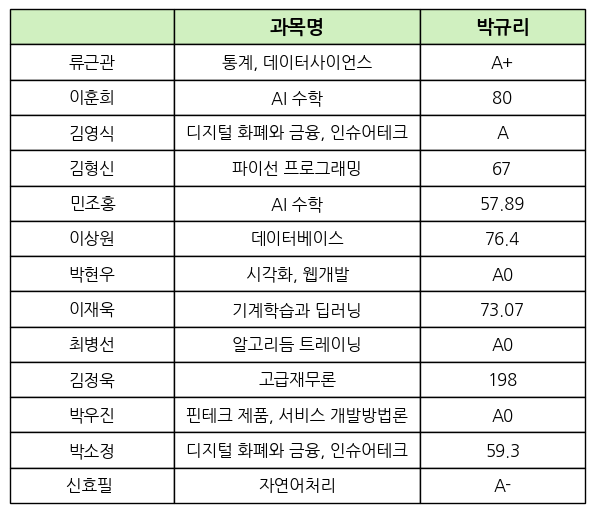

박규리 saved


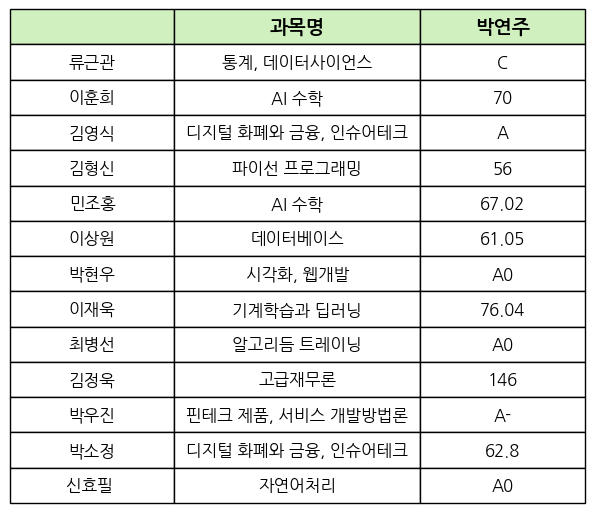

박연주 saved


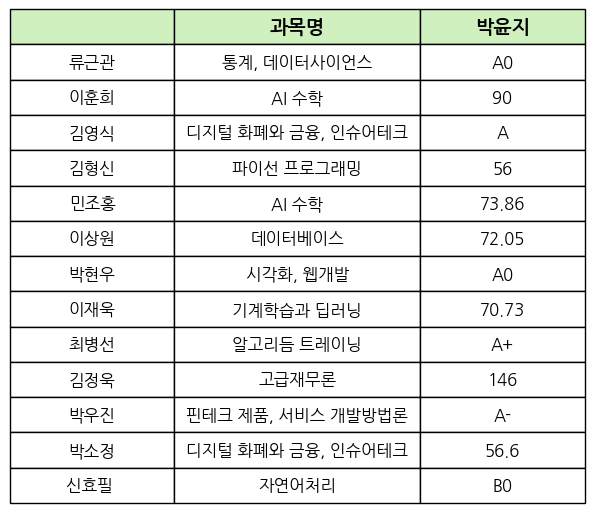

박윤지 saved


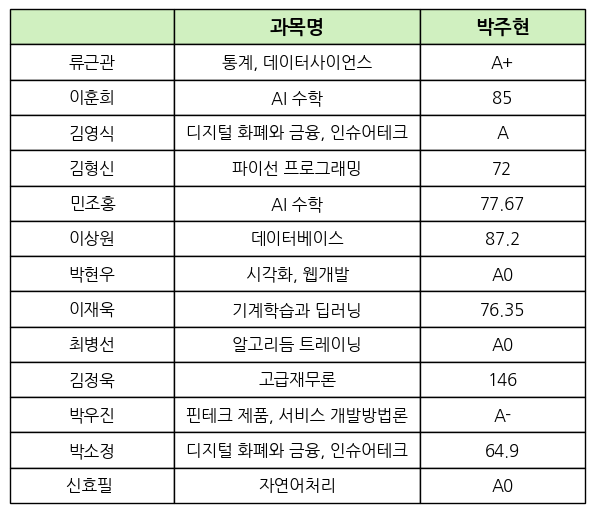

박주현 saved


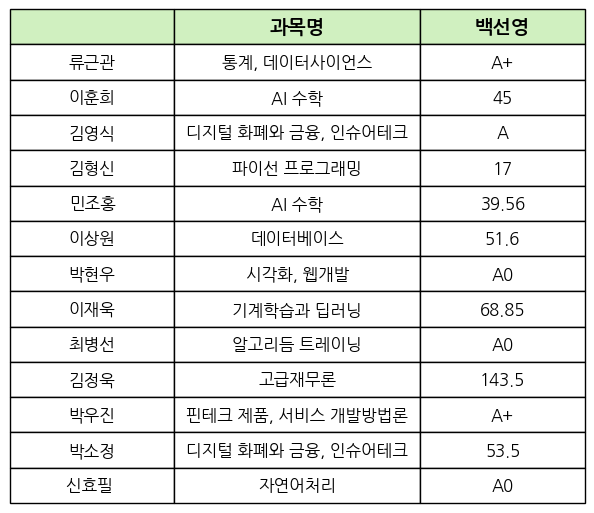

백선영 saved


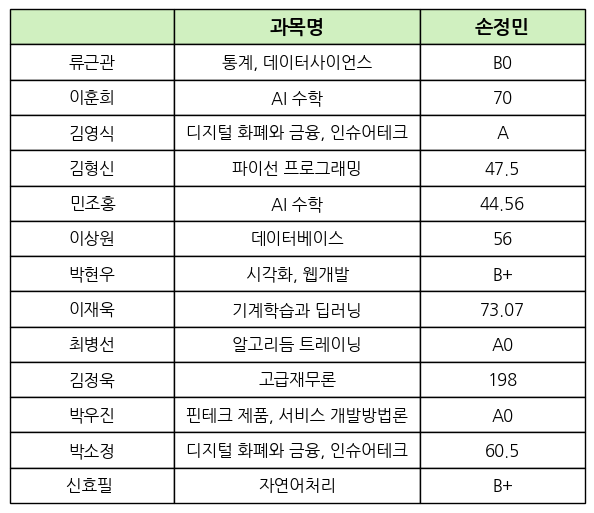

손정민 saved


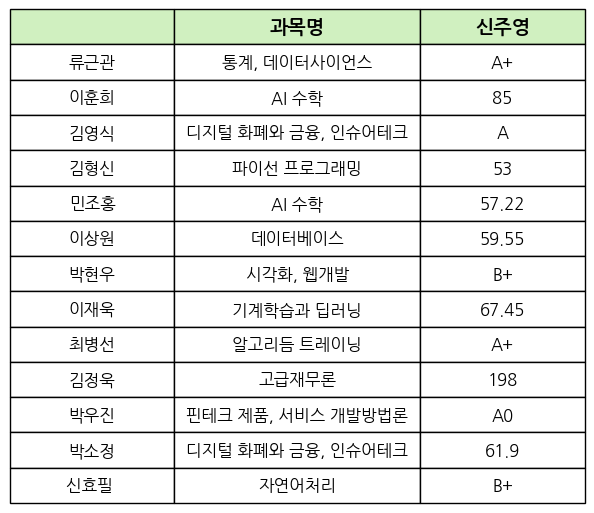

신주영 saved


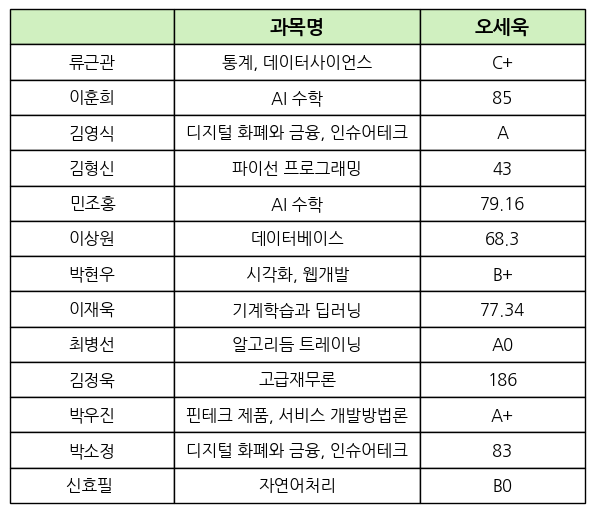

오세욱 saved


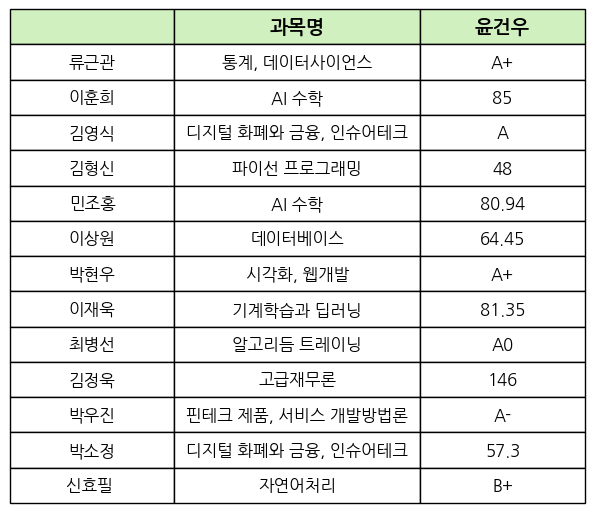

윤건우 saved


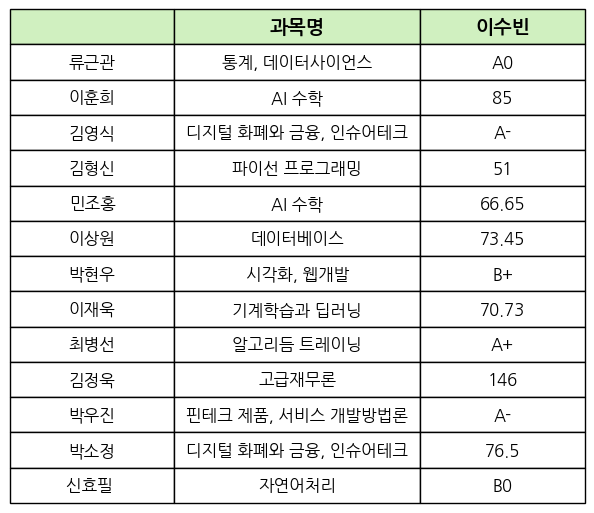

이수빈 saved


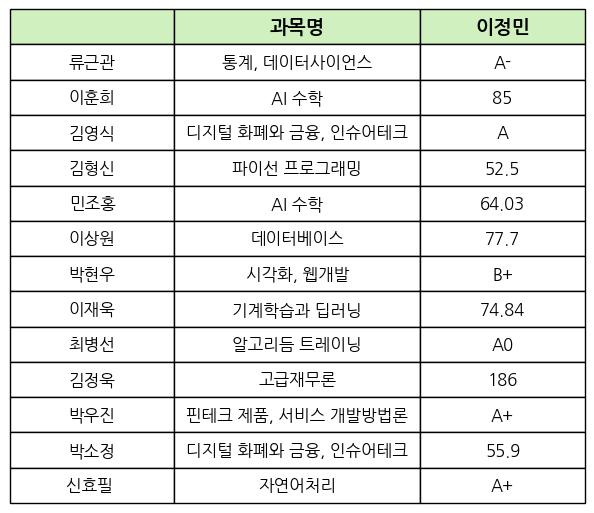

이정민 saved


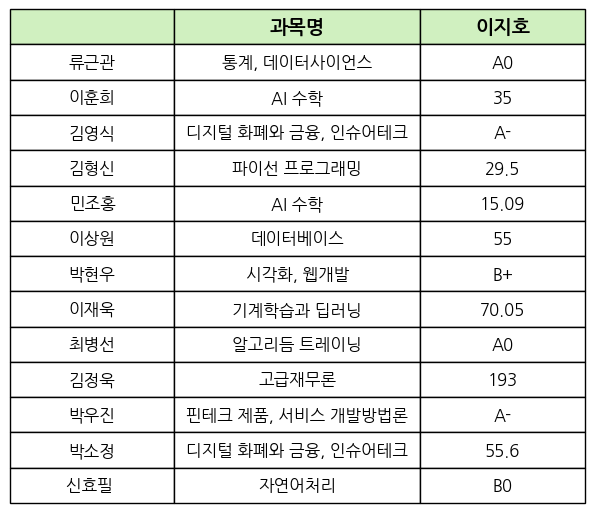

이지호 saved


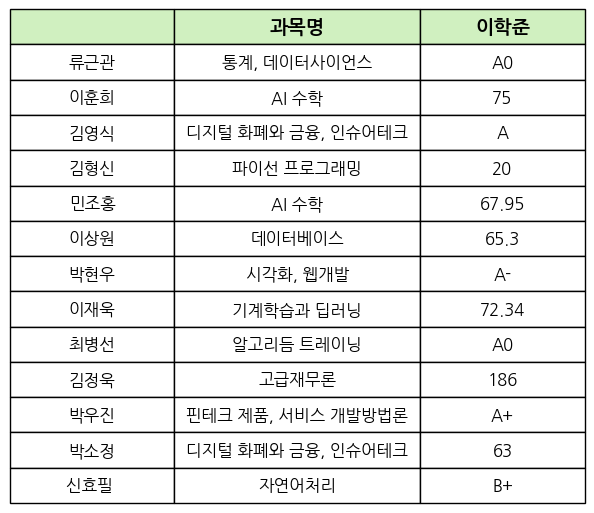

이학준 saved


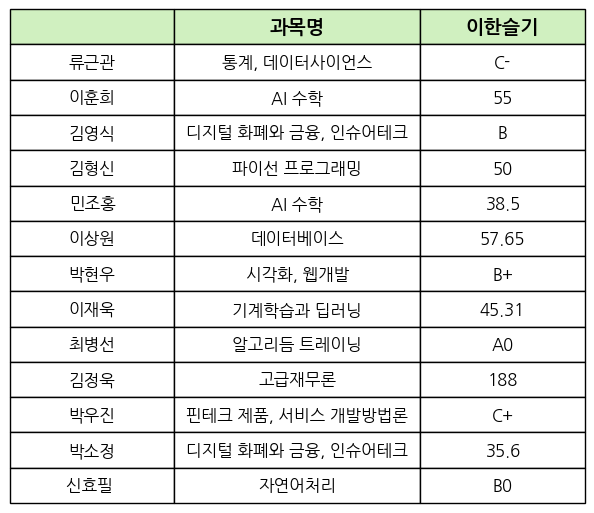

이한슬기 saved


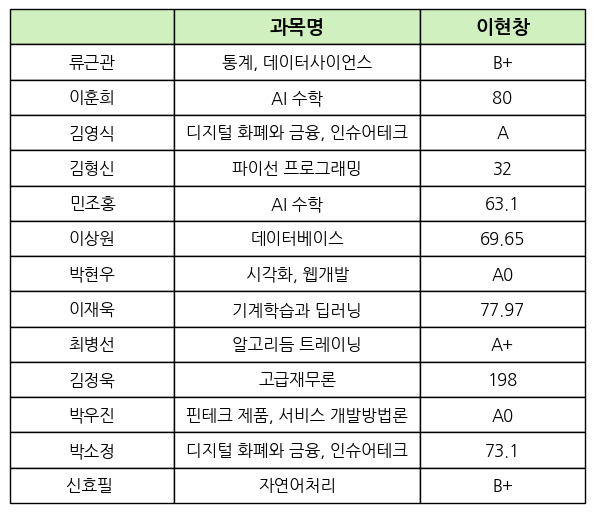

이현창 saved


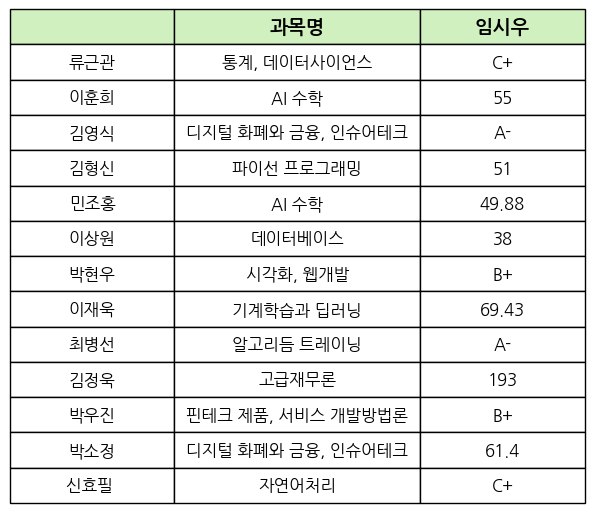

임시우 saved


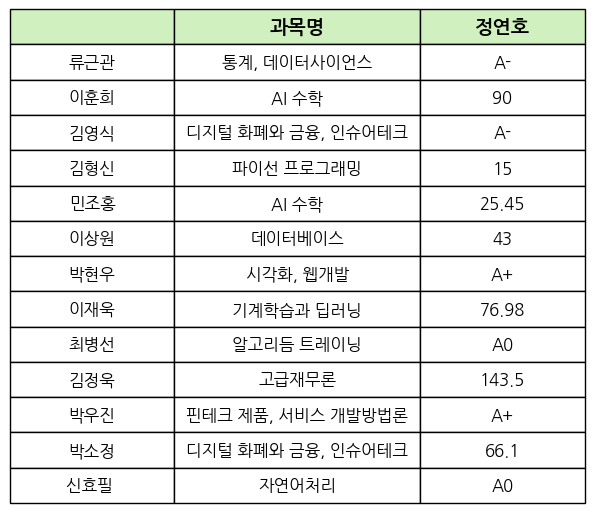

정연호 saved


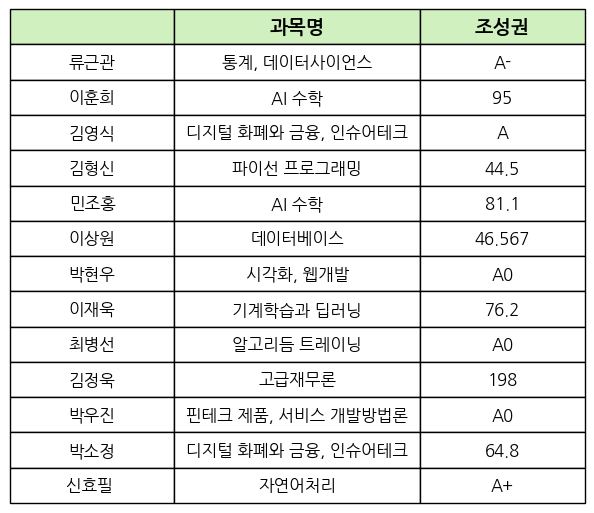

조성권 saved


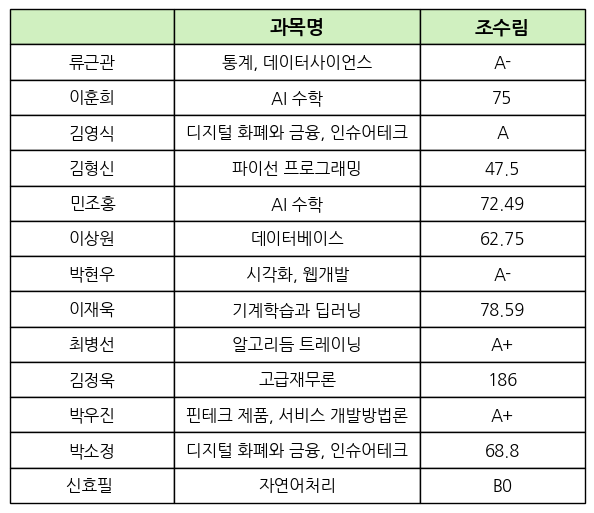

조수림 saved


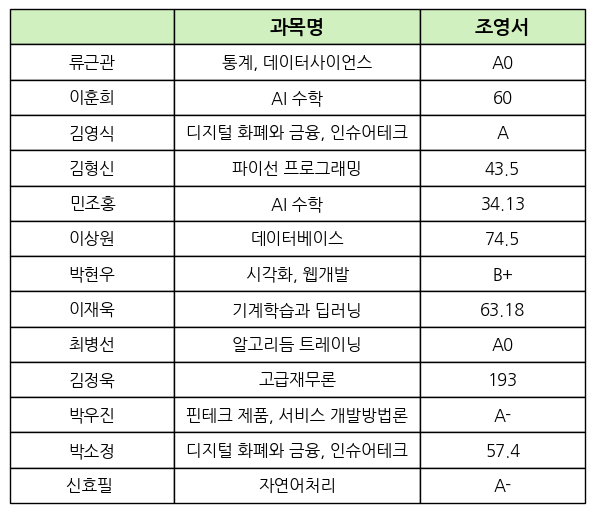

조영서 saved


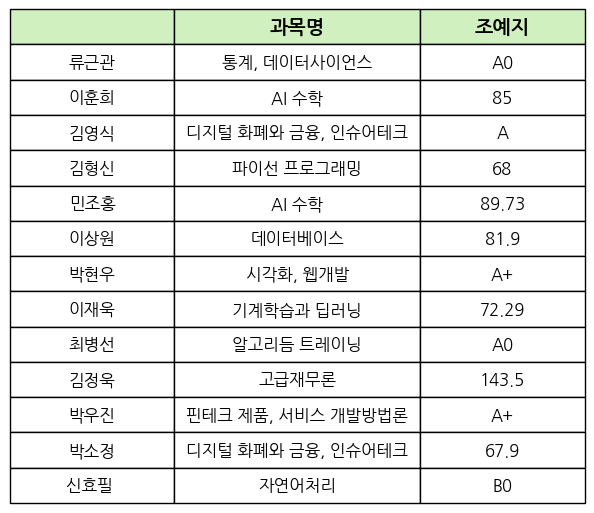

조예지 saved


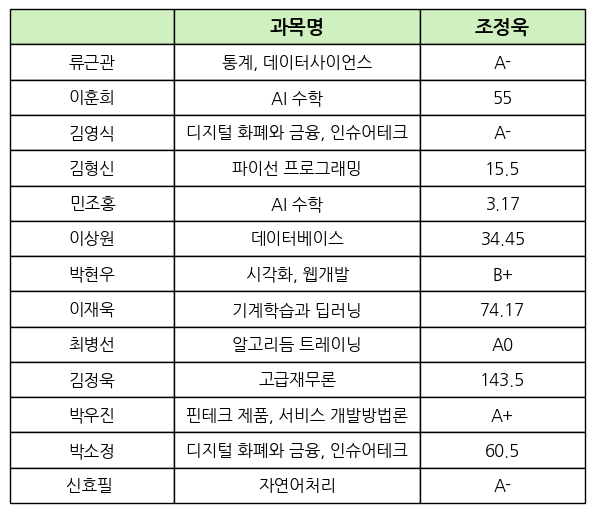

조정욱 saved


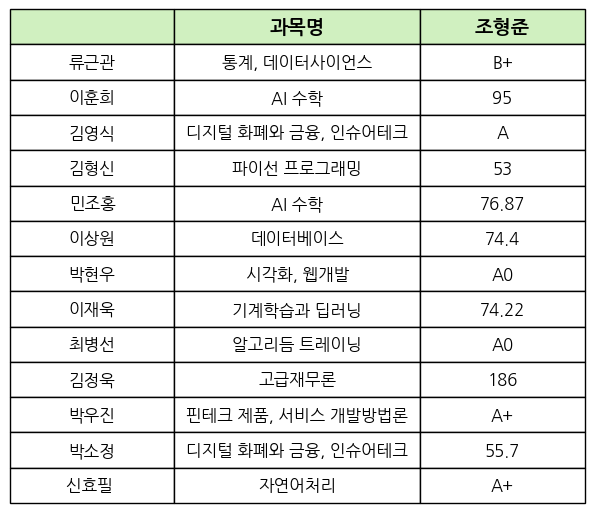

조형준 saved


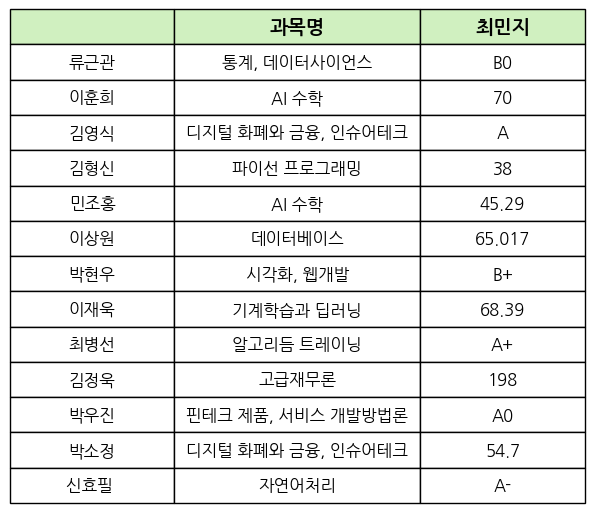

최민지 saved


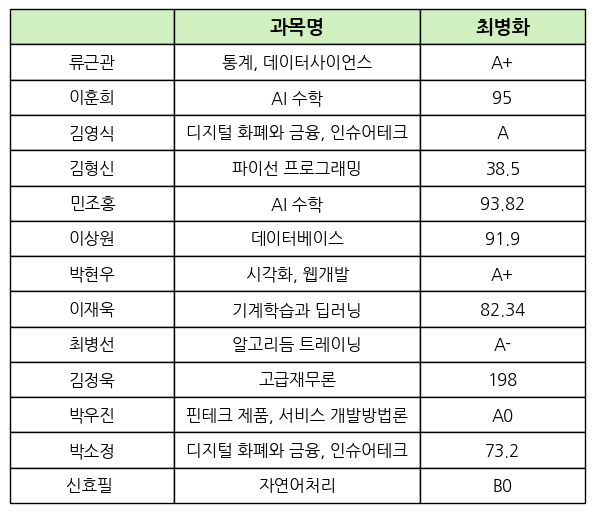

최병화 saved


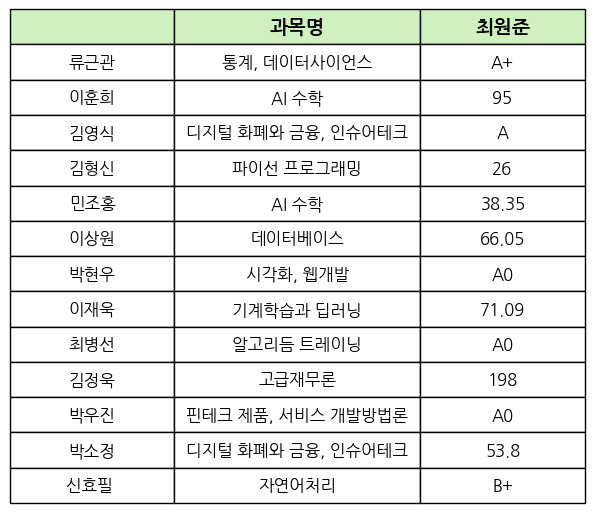

최원준 saved


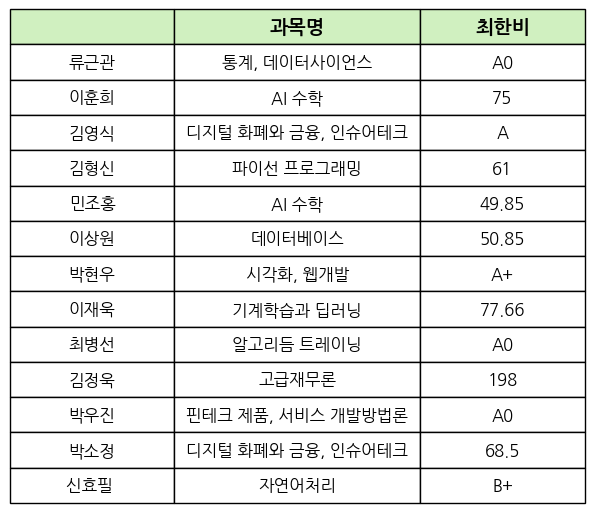

최한비 saved


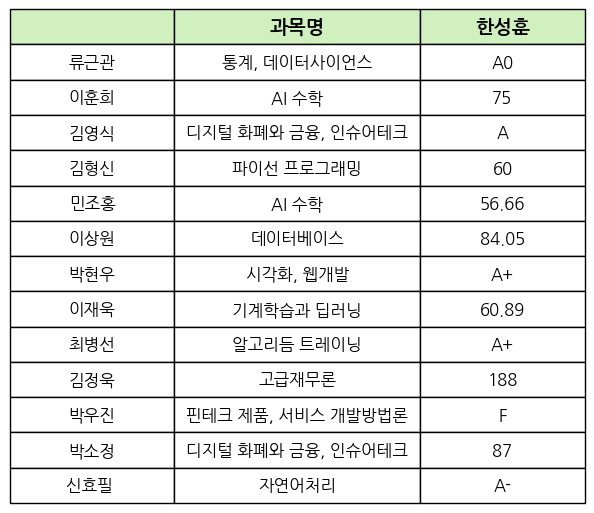

한성훈 saved


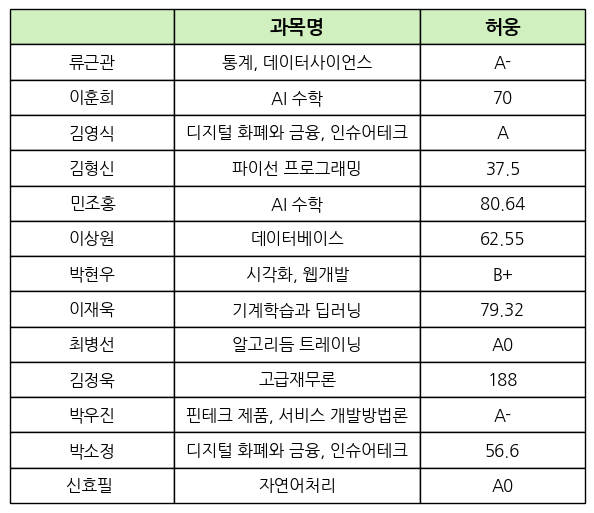

허웅 saved


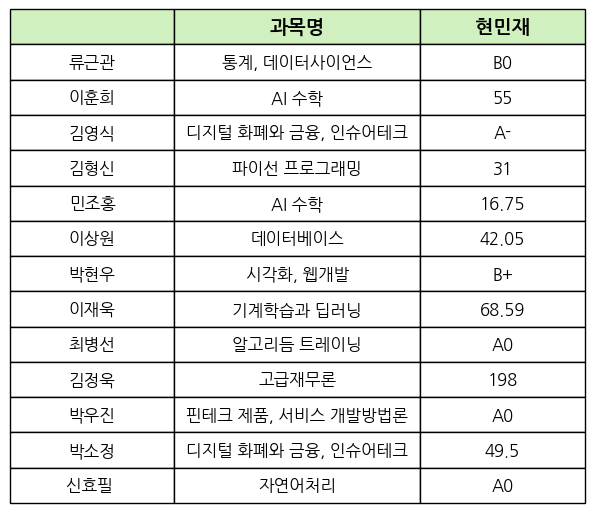

현민재 saved


In [6]:
# 이미지 저장

for col in df2.columns[2:]:

    sub_df = df2[['구분', '과목명', col]]
    sub_df.columns = ['','과목명',col]

    fig, ax = plt.subplots(figsize=(6, len(sub_df)*0.4))
    ax.axis('off')

    table = ax.table(
        cellText=sub_df.values,
        colLabels=sub_df.columns,
        loc='center',
        cellLoc='center'
    )
    table.auto_set_font_size(False)  # 폰트 자동 크기 조절 끄기
    table.set_fontsize(12)           # ✅ 폰트 크기 수동 설정
    table.scale(1, 2)                # ✅ 셀 세로 크기도 키워주기

    # ✅ 가운데 컬럼(과목명)만 너비 늘리기
    col_to_expand = 1  # 0=교수명, 1=과목명, 2=성적

    n_rows = len(sub_df) + 1  # +1 for header row
    for row in range(n_rows):
        cell = table[row, col_to_expand]
        cell.set_width(0.5)  # 기본보다 넓게 설정 (0.2~0.5 정도가 적당)
    # ✅ 첫 번째 행(헤더)만 bold 처리
    for col2 in range(len(sub_df.columns)):
        cell = table[0, col2]
        cell_text = cell.get_text()

        cell_text.set_fontproperties(fontprop)
        cell_text.set_fontsize(14)
        cell.set_facecolor('#d0f0c0')


    # table.scale(1, 1.5)
    plt.tight_layout()
    plt.show()
    # plt.savefig(f'/content/drive/MyDrive/10기성적이미지/{col}.png', dpi=300)
    print(col, 'saved')
    plt.close()
